# BIKE SHARING ASSIGNMENT

### Business Goals : 

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### We need to answer two questions for the company:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.



In [1]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


In [3]:
# Importing the Dataset
df= pd.read_csv("day.csv")

### Data Understanding

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Feature Engineering

#### Here, We are creating various drived variables using the data given. I am not going to use these variables in model building, therefore I will create a new dataframe to store these variables. 

In [7]:
df_fe = pd.read_csv("day.csv")

# 1) Registered to Casual users Ratio --> rc_ratio
df_fe["rc_ratio"] = df_fe["registered"] / df_fe["casual"]

# 2) Felling(atemp) to actual temp(temp) ratio --> temp_ratio
df_fe["temp_ratio"] = df_fe["atemp"] / df_fe["temp"]

#3) Clubbing Weekend and holidays in a single column --> weekend_holiday
df_fe["weekend_holiday"] = list(map(lambda x,y : 1 if ((x==0) or (x==5)) or (y==1) else 0, df_fe["weekday"],df_fe["holiday"]))


In [8]:
df_fe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,rc_ratio,temp_ratio,weekend_holiday
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1.975831,1.288459,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,5.114504,1.186837,0
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,10.241667,1.176294,0
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,13.462963,1.293427,0
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,18.512195,1.231941,1


### Data Preparation

#### Dropping unnecessary columns from the dataframe.

In [9]:
# 1) instant -> This column works as a serial no. for the rows, therefore we dont require it.
# 2) dteday -> This column stores date, as we already have month and year in our data, we dont require date.
df= df.drop(["instant","dteday"],axis=1)
df.shape

(730, 14)

#### Checking for Null values in the dataframe.

In [10]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see there are no null values in the dataframe. So we can proceed further.

#### From the data dictionary, we can see that `season`, `weathersit`,`mnth`,`weekday` are categorical variables, therefore we will convert these into categorical features to further create their dummy variables.

In [11]:
# Converting above columns into categories.
cat = ["season", "weathersit", "mnth", "weekday"]
df[cat] = df[cat].astype("category")

In [12]:
df.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

#### Assigning season and weathersit appropriate labels for better understanding.


In [13]:
# 1) season column
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
# A function to convert 1,2,3,4 to spring, summer, fall, winter respectively.
def convert_seasons(x):
    if x==1:
        return("spring")
    elif x==2:
        return("summer")
    elif x==3:
        return("fall")
    elif x==4:
        return("winter")


In [15]:
# Applying the function to season column    
df["season"] = df["season"].apply(lambda x:convert_seasons(x))
df["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
# 2) weathersit column
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
# A function to convert 1,2,3 to clear, mist, light rain respectively.
def convert_weather(x):
    if x==1:
        return("clear")
    elif x==2:
        return("mist")
    elif x==3:
        return("light_rain")

In [18]:
# Applying the function to weathersit column.
df["weathersit"] = df["weathersit"].apply(lambda x: convert_weather(x))
df["weathersit"].value_counts()

clear         463
mist          246
light_rain     21
Name: weathersit, dtype: int64

### EDA

#### Analysis for Numerical Variables

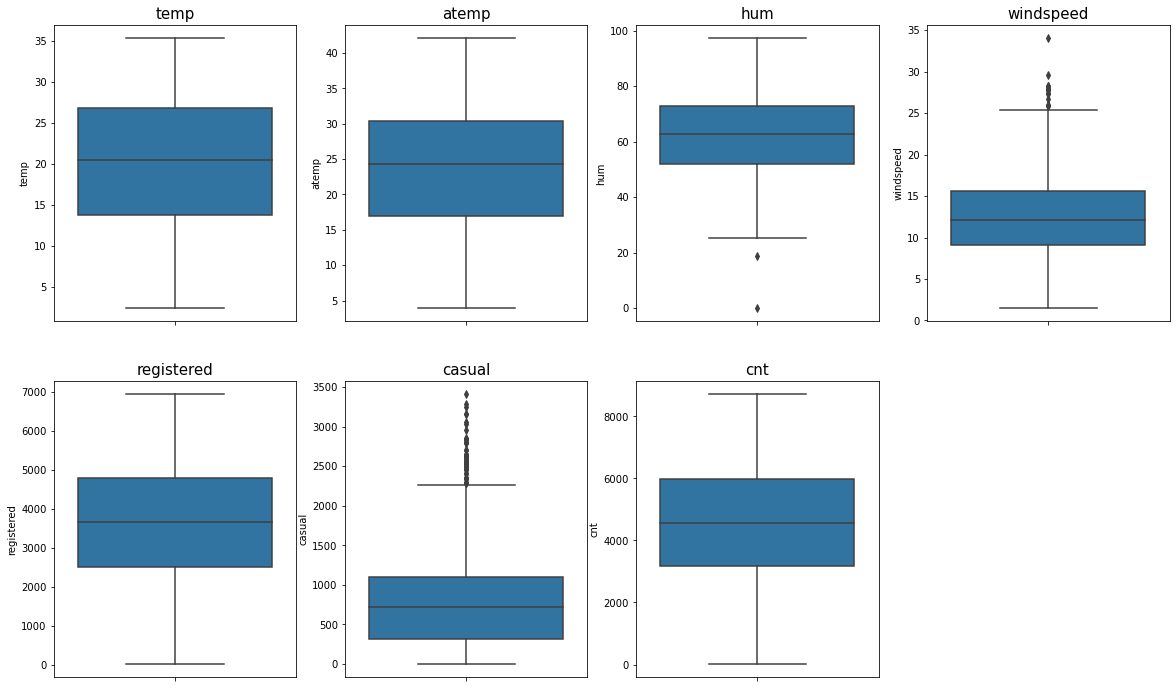

In [19]:
numeric = ["temp","atemp","hum","windspeed","registered","casual","cnt"]
plt.figure(figsize=(20,12))
for i in range(0,len(numeric)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y= numeric[i], data= df)
    plt.title(numeric[i],{"fontsize":15})
plt.show()    

#### Analysis of categorical variables wrt to the target variable: no. of bike users in a day

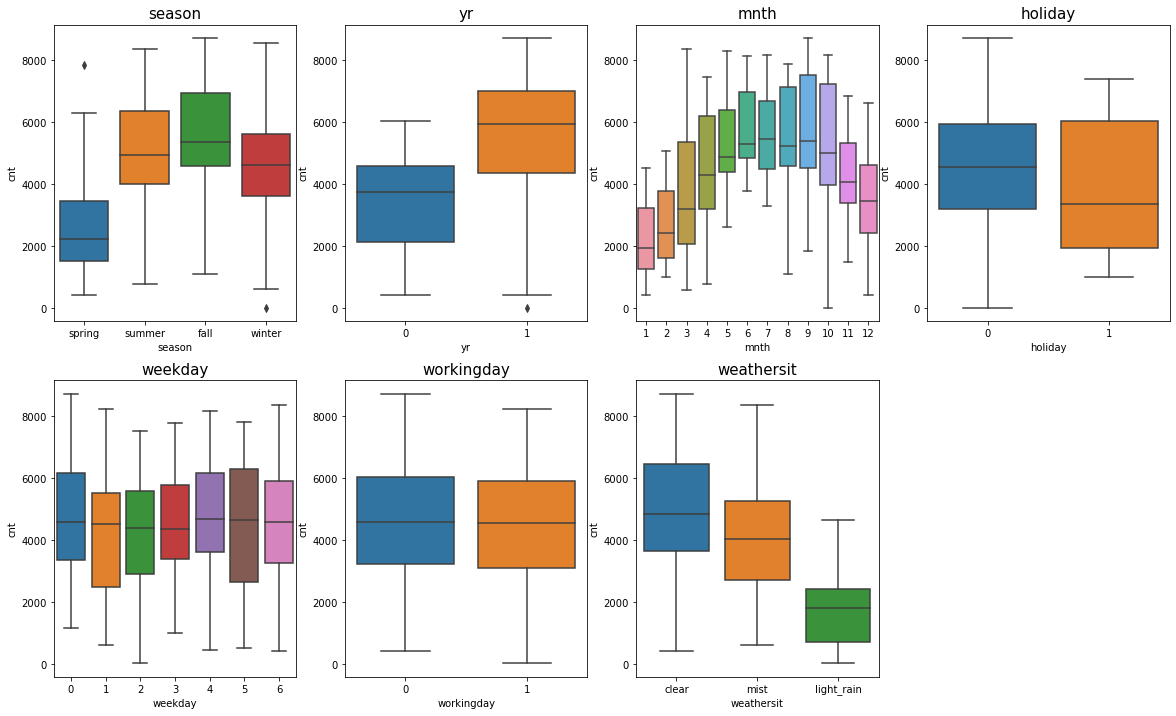

In [20]:
cat = ["season", "yr" ,"mnth", "holiday", "weekday", "workingday", "weathersit"]
plt.figure(figsize=(20,12))
for i in range(0,len(cat)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y= "cnt",x= cat[i], data= df)
    plt.title(cat[i],{"fontsize":15})
plt.show()

`Inference` : 
- During Spring Season there are least no. of bike rentals.
- Sales increases significantly in the year 2019 with median users increasing from 4000 in 2018 to 6000 in 2019.
- Working Day does'nt have much affect on no. of bike users.
- Months 5,6,7,8,9,10 have a median of more than 4000 bike users.
- Very less people rent bikes during rainy season.

#### Pairplot btw numerical variables.

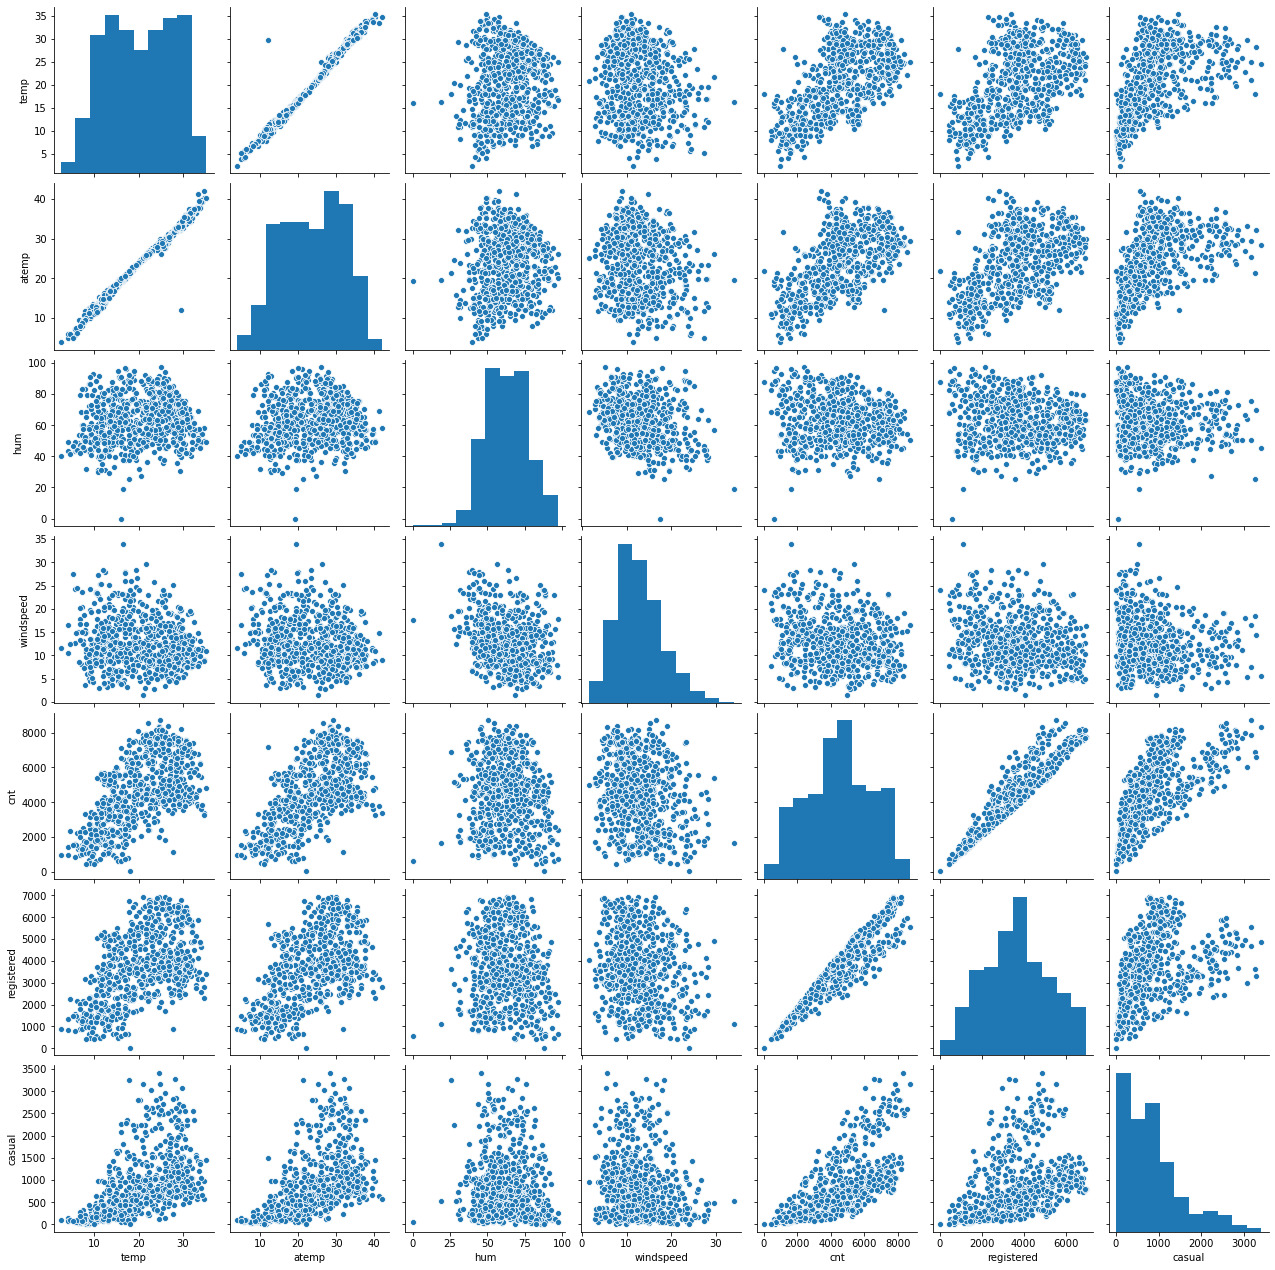

In [21]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt","registered","casual"])
plt.show()

`INFERENCE` : temp and atemp are linearly related and shall cause multicollinearity in our model.

### Dummy Variables

In [22]:
# Created dummies for Categorical Variables, in our case, we converted 2 variables namely "weathersit" and "season"
# to categorical type so that we can create their dummy variables.

# This line of code does 3 things:
# 1) Creates Dummy variabless.
# 2) Drop original variable for which the dummy was created.
# 3) Drop first dummy variable for each set of dummies created.

df= pd.get_dummies(df, drop_first=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   casual                 730 non-null    int64  
 8   registered             730 non-null    int64  
 9   cnt                    730 non-null    int64  
 10  season_summer          730 non-null    uint8  
 11  season_fall            730 non-null    uint8  
 12  season_winter          730 non-null    uint8  
 13  mnth_2                 730 non-null    uint8  
 14  mnth_3                 730 non-null    uint8  
 15  mnth_4

### Splitting the Data into Training and Testing set.

In [24]:
# Before Splitting the Dataset into Train and Test data, We will drop  Registered because registered + casual = cnt.
df= df.drop(["registered"], axis=1)

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively.
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features.

In [26]:
# We will use minmax scaling.
Scaler = MinMaxScaler()

In [27]:
# Applying Scaler to all the columns except "0-1" and dummy variables.

scale_vars = [x for x in df.columns if (df[x].dtype=="int64") or (df[x].dtype=="float64")]

df_train[scale_vars] = Scaler.fit_transform(df_train[scale_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_mist,weathersit_light_rain
653,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.280402,0.864243,0,...,0,0,0,0,1,0,0,0,0,0
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.827658,0,...,0,0,0,0,1,0,0,0,0,0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.290765,0.465255,0,...,0,0,0,0,0,0,0,0,1,0
728,1.0,0.0,1.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.204096,0,...,0,1,1,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.340750,0.482973,1,...,0,0,0,0,0,0,0,0,1,0


### Checking correlations between different variables of the training dataset.

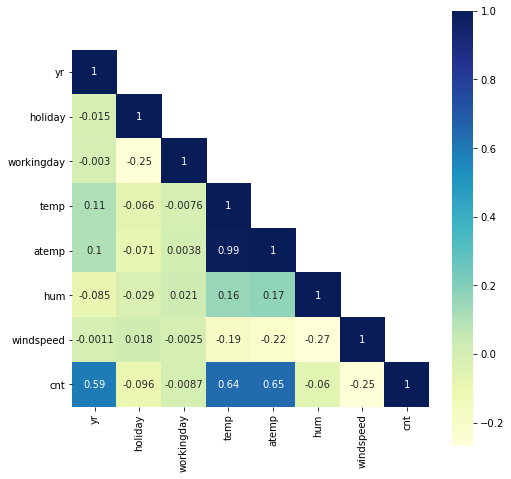

In [28]:
plt.figure(figsize=(8,8))
corrMatt= df_train[["yr","holiday","workingday","temp","atemp","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, annot=True, cmap="YlGnBu",square=True, mask=mask)
plt.show()

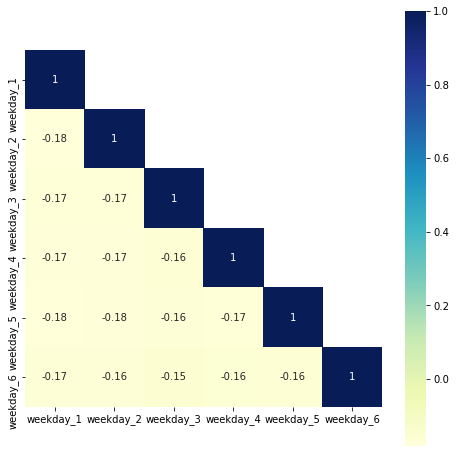

In [29]:
plt.figure(figsize=(8,8))
weekdays = [i for i in df_train.columns if i[:-2]=="weekday"]
corrMatt= df_train[weekdays].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, annot=True, cmap="YlGnBu",square=True, mask=mask)
plt.show()

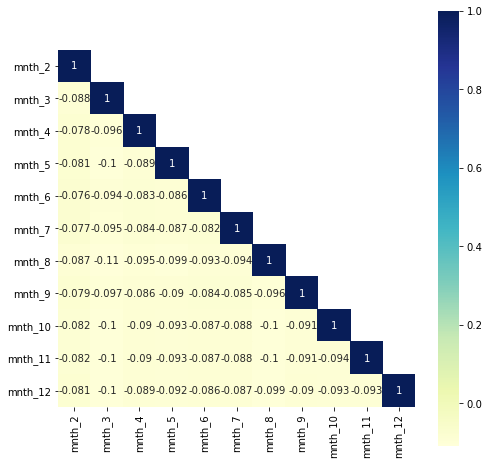

In [30]:
plt.figure(figsize=(8,8))
months = [i for i in df_train.columns if i[:4]=="mnth"]
corrMatt= df_train[months].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, annot=True, cmap="YlGnBu",square=True, mask=mask)
plt.show()

### Dividing into X and Y sets for Model Building.

In [31]:
y_train = df_train.pop("cnt")
x_train = df_train

In [32]:
x_train.shape

(510, 30)

In [33]:
y_train.shape

(510,)

### Building our Model.

In [34]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#### Using RFE to find out the top 15 most important variables.

In [35]:
#Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Using RFE(Recursive Feature Elimination) taking output number of variables equal to 15

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 3),
 ('season_winter', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 9),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 11),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', False, 12),
 ('mnth_11', False, 16),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', False, 15),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_mist', False, 4),
 ('weathersit_light_rain', True, 1)]

In [38]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'season_summer',
       'season_winter', 'mnth_9', 'weekday_1', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_light_rain'],
      dtype='object')

In [39]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_fall', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_2', 'weathersit_mist'],
      dtype='object')

### Building model using statsmodel for detailed statistics.

In [40]:
# Creating x_test dataframe using RFE selected variables.
x_train_rfe = x_train[col]

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [42]:
# Checking the Dataframe
x_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,casual,season_summer,season_winter,mnth_9,weekday_1,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light_rain
653,1.0,1.0,0.0,0.509887,0.575354,0.300794,0.280402,0,1,0,0,1,0,0,0,0
576,1.0,1.0,0.0,0.815169,0.725633,0.264686,0.294422,0,0,0,0,1,0,0,0,0
426,1.0,1.0,0.0,0.442393,0.640189,0.255342,0.290765,0,0,0,0,0,0,0,0,0
728,1.0,1.0,0.0,0.245101,0.498067,0.663106,0.110332,0,0,0,1,0,0,0,0,0
482,1.0,1.0,0.0,0.395666,0.504508,0.188475,0.340750,1,0,0,0,0,0,0,0,0


### Model 1 : Using 15 variables given by RFE

In [43]:
# Running the linear model
lm1 = sm.OLS(y_train,x_train_rfe.astype(float)).fit()

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     250.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.26e-219
Time:                        03:28:24   Log-Likelihood:                 587.34
No. Observations:                 510   AIC:                            -1143.
Df Residuals:                     494   BIC:                            -1075.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

#### VIF (Model 1)

In [45]:
x_train_rfe.drop(["const"], axis=1, inplace=True)

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,12.79
3,hum,11.15
5,casual,6.38
4,windspeed,3.68
0,yr,2.25
6,season_summer,1.72
7,season_winter,1.69
9,weekday_1,1.62
11,weekday_4,1.61
12,weekday_5,1.61


### Model 2 : Dropping `hum` from Model 1 
even though its VIF is second highest, we will drop this and not temp because logically thinking temp may be an important variable for our analysis.

In [47]:
# Creating x_train_new1 dataframe for model 2.
x_train_new1 = x_train_rfe.drop(["hum"], axis=1)

In [48]:
# Adding a constant variable
x_train_new1 = sm.add_constant(x_train_new1)

In [49]:
# Running the Linear regression on model2
lm2= sm.OLS(y_train,x_train_new1).fit()

In [50]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.34e-210
Time:                        03:28:25   Log-Likelihood:                 562.00
No. Observations:                 510   AIC:                            -1094.
Df Residuals:                     495   BIC:                            -1030.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

#### VIF (Model 2)

In [51]:
x_train_new1.drop(["const"], axis=1, inplace=True)

In [52]:
# Calculating VIFs for 2nd model.
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
x = x_train_new1
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,9.04
4,casual,6.32
3,windspeed,3.30
0,yr,2.23
5,season_summer,1.68
10,weekday_4,1.59
11,weekday_5,1.55
8,weekday_1,1.54
9,weekday_3,1.52
12,weekday_6,1.43


### Model 3: Dropping `casual` from Model 2
beacause of its high VIF.

In [53]:
x_train_new2= x_train_new1.drop(["casual"], axis=1)
x_train_new2= sm.add_constant(x_train_new2)
lm3= sm.OLS(y_train,x_train_new2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          7.54e-167
Time:                        03:28:25   Log-Likelihood:                 456.03
No. Observations:                 510   AIC:                            -884.1
Df Residuals:                     496   BIC:                            -824.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### VIF (Model 3)

In [54]:
x_train_new2.drop(["const"], axis=1, inplace=True)

In [55]:
vif = pd.DataFrame()
x = x_train_new2
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.27
3,windspeed,3.20
0,yr,2.01
4,season_summer,1.56
7,weekday_1,1.42
9,weekday_4,1.42
10,weekday_5,1.40
5,season_winter,1.38
8,weekday_3,1.38
11,weekday_6,1.36


### Model 4: Dropping weekday_3 from model 3

In [56]:
x_train_new3= x_train_new2.drop(["weekday_3"], axis=1)
x_train_new3= sm.add_constant(x_train_new3)
lm4= sm.OLS(y_train,x_train_new3).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.90e-168
Time:                        03:28:25   Log-Likelihood:                 455.98
No. Observations:                 510   AIC:                            -886.0
Df Residuals:                     497   BIC:                            -830.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### VIF (Model 4)

In [57]:
x_train_new3.drop(["const"], axis=1, inplace=True)

In [58]:
vif = pd.DataFrame()
x = x_train_new3
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.05
3,windspeed,3.15
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.36
7,weekday_1,1.32
8,weekday_4,1.32
9,weekday_5,1.30
10,weekday_6,1.27
6,mnth_9,1.20


### Model 5: Dropping weekday_5
because its p-value > 0.05, it is insignificant for our model.

In [59]:
x_train_new4= x_train_new3.drop(["weekday_5"], axis=1)
x_train_new4= sm.add_constant(x_train_new4)
lm5= sm.OLS(y_train,x_train_new4).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.17e-169
Time:                        03:28:25   Log-Likelihood:                 455.77
No. Observations:                 510   AIC:                            -887.5
Df Residuals:                     498   BIC:                            -836.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### VIF (Model 5)

In [60]:
x_train_new4.drop(["const"], axis=1, inplace=True)

In [61]:
vif = pd.DataFrame()
x = x_train_new4
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.89
3,windspeed,3.07
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.36
8,weekday_4,1.26
7,weekday_1,1.25
9,weekday_6,1.21
6,mnth_9,1.20
10,weathersit_light_rain,1.07


### Model 6 : Dropping `weekday_1` from model 6 
because of high p-value, it is insignificant for our model.

In [62]:
x_train_new5= x_train_new4.drop(["weekday_1"], axis=1)
x_train_new5= sm.add_constant(x_train_new5)
lm6= sm.OLS(y_train,x_train_new5).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.21e-170
Time:                        03:28:25   Log-Likelihood:                 455.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     499   BIC:                            -842.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### VIF (Model 6)

In [63]:
x_train_new5.drop(["const"], axis=1, inplace=True)

In [64]:
vif = pd.DataFrame()
x = x_train_new5
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.80
3,windspeed,2.99
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.35
7,weekday_4,1.21
6,mnth_9,1.20
8,weekday_6,1.17
9,weathersit_light_rain,1.07
1,holiday,1.04


### Model 7 : Dropping `weekday_6` from Model 6
beacause its p-value > 0.05

In [65]:
x_train_new6= x_train_new5.drop(["weekday_6"], axis=1)
x_train_new6= sm.add_constant(x_train_new6)
lm7= sm.OLS(y_train,x_train_new6).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.61e-171
Time:                        03:28:25   Log-Likelihood:                 454.84
No. Observations:                 510   AIC:                            -889.7
Df Residuals:                     500   BIC:                            -847.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### VIF (Model 7)

In [66]:
x_train_new6.drop(["const"], axis=1, inplace=True)

In [67]:
vif = pd.DataFrame()
x = x_train_new6
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.71
3,windspeed,2.97
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.35
6,mnth_9,1.20
7,weekday_4,1.18
8,weathersit_light_rain,1.07
1,holiday,1.04


### Model 8 : Dropping weekday_4 
because p-value > 0.05

In [68]:
x_train_new7= x_train_new6.drop(["weekday_4"], axis=1)
x_train_new7= sm.add_constant(x_train_new7)
lm8= sm.OLS(y_train,x_train_new7).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.42e-171
Time:                        03:28:25   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### VIF (Model 8)

In [69]:
x_train_new7.drop(["const"], axis=1, inplace=True)

In [70]:
vif = pd.DataFrame()
x = x_train_new5
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.80
3,windspeed,2.99
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.35
7,weekday_4,1.21
6,mnth_9,1.20
8,weekday_6,1.17
9,weathersit_light_rain,1.07
1,holiday,1.04


#### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number). 

## Residual Analysis of the Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), we will plot the histogram of the error terms and see what it looks like.

In [71]:
x_train_lm = sm.add_constant(x_train_new7)
y_train_pred = lm8.predict(x_train_lm)

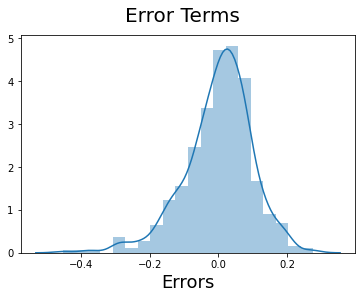

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### From the above histogram, we can see that error terms(yi - y pred) are NORMALLY DISTRIBUTED, thus validating our Assumption.

## Making Predictions using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. `eigth model`.

In [73]:
# Applying Scaling to test set.

scale_vars = [x for x in df.columns if (df[x].dtype=="int64") or (df[x].dtype=="float64")]

df_test[scale_vars] = Scaler.transform(df_test[scale_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,cnt,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_mist,weathersit_light_rain
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.933557,0.692706,0,...,0,0,0,0,1,0,0,0,1,0
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.265163,0.712034,1,...,0,0,0,0,0,1,0,0,0,0
299,0.0,0.0,0.0,0.511964,0.496145,0.837699,0.334206,0.072539,0.303382,0,...,0,0,0,0,0,0,0,1,1,0
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.268820,0.547400,0,...,0,0,0,0,0,0,1,0,0,0
152,0.0,0.0,0.0,0.817246,0.741471,0.314298,0.537414,0.223712,0.569029,1,...,0,0,0,0,0,0,0,1,0,0


In [74]:
# Dividing into x_test and y_test

y_test = df_test.pop('cnt')
x_test = df_test

In [75]:
# Creating x_test_m6 dataframe by using the column names of x_train_new4 dataframe used for bulding model 5.
x_test_m8 = x_test[x_train_new7.columns]

In [76]:
x_test_m8 = sm.add_constant(x_test_m8)

In [77]:
x_test_m8.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_9,weathersit_light_rain
184,1.0,0.0,1.0,0.831783,0.084219,0,0,0,0
535,1.0,1.0,0.0,0.901354,0.153728,1,0,0,0
299,1.0,0.0,0.0,0.511964,0.334206,0,1,0,0
221,1.0,0.0,0.0,0.881625,0.339570,0,0,0,0
152,1.0,0.0,0.0,0.817246,0.537414,1,0,0,0


In [78]:
y_test_pred = lm8.predict(x_test_m8)

Text(0, 0.5, 'y_pred')

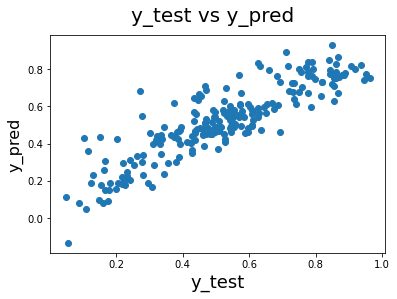

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Model Evaluation

In [80]:
from sklearn.metrics import r2_score

# Train R Squared
train_r2= round(r2_score(y_train, y_train_pred),3)

print("Train R Squared : ", train_r2)

# Train Adjusted R Squared
train_n = x_train_new7.shape[0]
train_p = x_train_new7.shape[1]
train_adjusted_r2 = round(1-(1-train_r2)*(train_n-1)/(train_n-train_p-1),2)

print("Train Adjusted R Squared : ", train_adjusted_r2)

# Test R Squared
test_r2= round(r2_score(y_test, y_test_pred),3)

print("Test R Squared : ", test_r2)

# Test Adjusted R Squared
test_n = x_test_m8.shape[0]
test_p = x_test_m8.shape[1]
test_adjusted_r2 = round(1-(1-test_r2)*(test_n-1)/(test_n-test_p-1),2)

print("Test Adjusted R Squared : ", test_adjusted_r2)



# Percentage Difference 
print("Percentage Difference between Train and Test R squared : ", round((train_r2 - test_r2)/train_r2 *100 ,2),"%")
print("Percentage Difference between Train and Test Adjusted R Squared : ", round((train_adjusted_r2 - test_adjusted_r2)/ train_adjusted_r2*100,2), "%")

Train R Squared :  0.803
Train Adjusted R Squared :  0.8
Test R Squared :  0.772
Test Adjusted R Squared :  0.76
Percentage Difference between Train and Test R squared :  3.86 %
Percentage Difference between Train and Test Adjusted R Squared :  5.0 %


## Final Model Interpretation

### Coefficient Values in our Model :

In [81]:
lm8.params

const                    0.087179
yr                       0.233667
holiday                 -0.087091
temp                     0.568657
windspeed               -0.145312
season_summer            0.080175
season_winter            0.127485
mnth_9                   0.089117
weathersit_light_rain   -0.254079
dtype: float64

### The Equation of Best Fitted Line is : 
#### cnt = 0.087179   +   (0.233667  $\times$  yr)   -   (0.087091 $\times$ holiday)   +   (0.568657 $\times$ temp)   -   (0.145312 $\times$ windspeed)   +    (0.080175 $\times$ season_summer)   +    (0.127485 $\times$ season_winter)   +   (0.089117 $\times$ mnth_9)  -   (0.254079 $\times$ weathersit_light_rain) 


### Interpretation of Coefficients:


- `yr` : A positive coeff. shows that no. of bike users increased from 2018 to 2019. 


- `holiday` : A coeff of -0.087091 tells us that if there is a holiday, the no. of users will decrease by 0.087091 units.


- `temp` : With increase in temprature by one unit, demand of bikes increases by 0.568657 units.


- `windspeed` : A coeff of -0.145312 indicates that with a unit increase in windspeed, no. of bike users decreases by 0.145312 units.


- `season_summer` : A coeff of 0.080175 indicates that during Smmer Sason, no. of bike users increase by 0.080175 units.


- `season_winter` : During Winter Season, no. of bike users increase by 0.127485 units.


- `mnth_9` : In the month of september, no. of bike users increase by 0.089117 units.


- `weathersit_light_rain` : During Rains, the no. of bike users decrease by 0.254079 units.

### Top 3 Features:
The top 3 features contributing significantly towards explaining the demand of the shared bikes:


- `temp` : Temprature seems to be the most important feature in predicting the demand of boom bikes. With increase in temprature demand for bikes increases.


- `rain` : Rainfall is the second important feature which affects the demand of bikes. People avoid using boom bikes when its raining.


- `yr` : In the year 2019 the demand for boom bikes have increased significantly, which makes it third most important variable.

## Conclusion

- The Company should continue using the same strategy which they have been using in the year 2019.


- They can rent bikes at discounted price on holidays to attract more customers.


- They can give out coupons in spring and fall season to increase their sale.


- The Company should customize their bikes in such a way that the rider is protected from rain. 


- Whenever a new rider rents a bike, a discount coupon should be given fornext ride to increase their rider community.